In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from scipy.stats import ttest_ind

In [35]:
path = ("C:/Personal/09142640/Desktop/KaggleV2-May-2016.csv")
df = pd.read_csv(path, low_memory = False)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [36]:
df.shape

(110527, 15)

In [37]:
df.groupby('SMS_received').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No_show,Status
SMS_received,,,,,,,,,,,,,,
0,75045,75045,75045,75045,75045,75045,75045,75045,75045,75045,75045,75045,75045,75045
1,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482,35482


In [38]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [39]:
df.Status.unique()

array([1, 0], dtype=int64)

# Research proposal

Patients should equally show up for both the groups of data-who recieved SMS reminders that they have a doctors appointment and patients who did not.

# Hypothesis


We hypothesize that patients who recieved the SMS reminder will be more likely to show up to their appointment than patients who did not recieve the SMS reminder

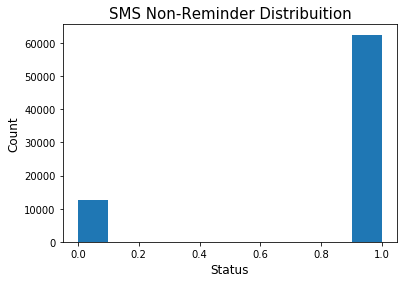

In [67]:
plt.hist(df[df.SMS_received == 0].Status)
plt.title('SMS Non-Reminder Distribuition', fontsize=15)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Status',fontsize=12)
plt.show()

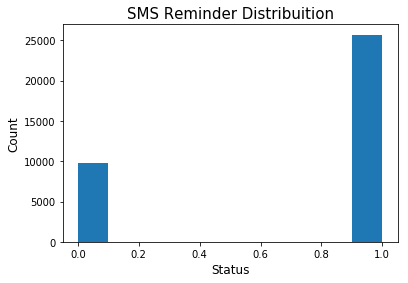

In [49]:
plt.hist(df[df.SMS_received == 1].Status)
plt.title('SMS Reminder Distribuition', fontsize=15)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Status',fontsize=12)
plt.show()

In [59]:
# Sort the dataframe by target
target_smsreminder = df.loc[df['SMS_received'] == 1]
target_smsreminder[['Status']].describe()


,Status
count,35482.000000
mean,0.724255
std,0.446895
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [61]:
target_nonsmsreminder= df.loc[df['SMS_received'] == 0]
target_nonsmsreminder[['Status']].describe()

,Status
count,75045.000000
mean,0.832967
std,0.373008
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


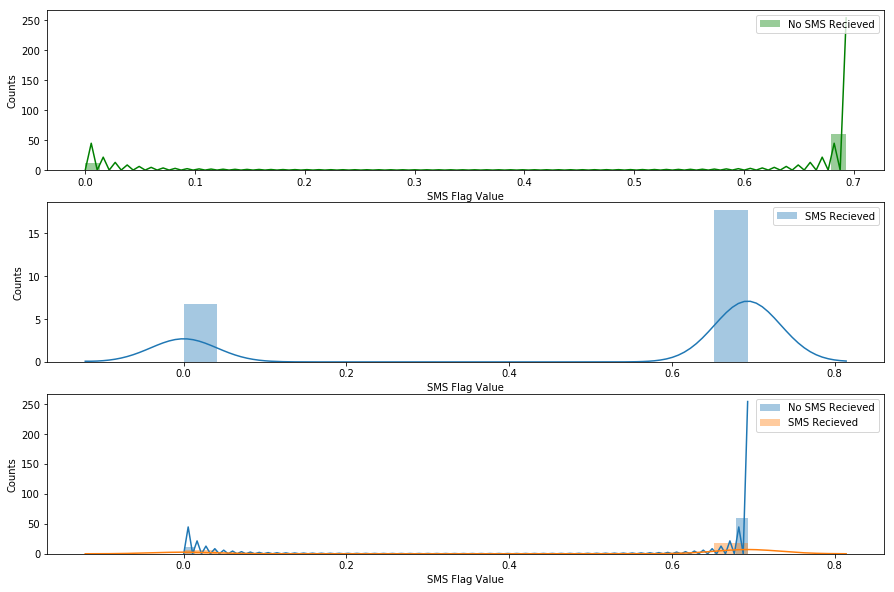

In [77]:
# Sort the dataframe by target
target_sms0 = df.loc[df['SMS_received'] == 0]
target_sms1 = df.loc[df['SMS_received'] == 1]
plt.figure(figsize=(15,10))
plt.subplot(311)
sns.distplot(np.log(target_sms0[['Status']]+1), color='g', label='No SMS Recieved')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('SMS Flag Value')

plt.subplot(312)
sns.distplot(np.log(target_sms1[['Status']] + 1), label='SMS Recieved')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('SMS Flag Value')

plt.subplot(313)
sns.distplot(np.log(target_sms0[['Status']] + 1), label='No SMS Recieved')
sns.distplot(np.log(target_sms1[['Status']] + 1), label='SMS Recieved')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('SMS Flag Value')
plt.show()

In [62]:

print('SMS Reminder:', target_smsreminder[['Status']].shape)
print('Non SMS Reminder:', target_nonsmsreminder[['Status']].shape)

SMS Reminder: (35482, 1)
Non SMS Reminder: (75045, 1)


In [66]:
print('Control Sample Size:',len(df[df.SMS_received == 0]))
print('Test Sample Size:', len(df[df.SMS_received == 1]))
print('Rate of people who didnt get SMS but showed up:', df[df.SMS_received == 0].Status.mean())
print('Rate of people who did get SMS but showed up:', df[df.SMS_received == 1].Status.mean())
print('Ttest:', ttest_ind(df[df.SMS_received == 0].Status,df[df.SMS_received == 1].Status))

Control Sample Size: 75045
Test Sample Size: 35482
Rate of people who didnt get SMS but showed up: 0.8329668865347458
Rate of people who did get SMS but showed up: 0.7242545516036301
Ttest: Ttest_indResult(statistic=42.37227043332899, pvalue=0.0)


# Conclusion

So this would seem to indicate that the data from the two groups are significantly different so that we can say for sure, SMS_reminders have  impact on patients coming to their appointments. Comparing the distribution plots, we visually confirm, we can conclude that there is  significant difference between the two groups.Further analysis can explain the reason behind the difference